In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
data = pd.read_csv('winequality_red.csv')

In [59]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Logistic Regression

In [60]:
data_logistic = data

In [61]:
data_logistic.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
#checking  datatypes of each column
data_logistic.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [63]:
#finding null data
total_null = data_logistic.isnull().sum()
total_null

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

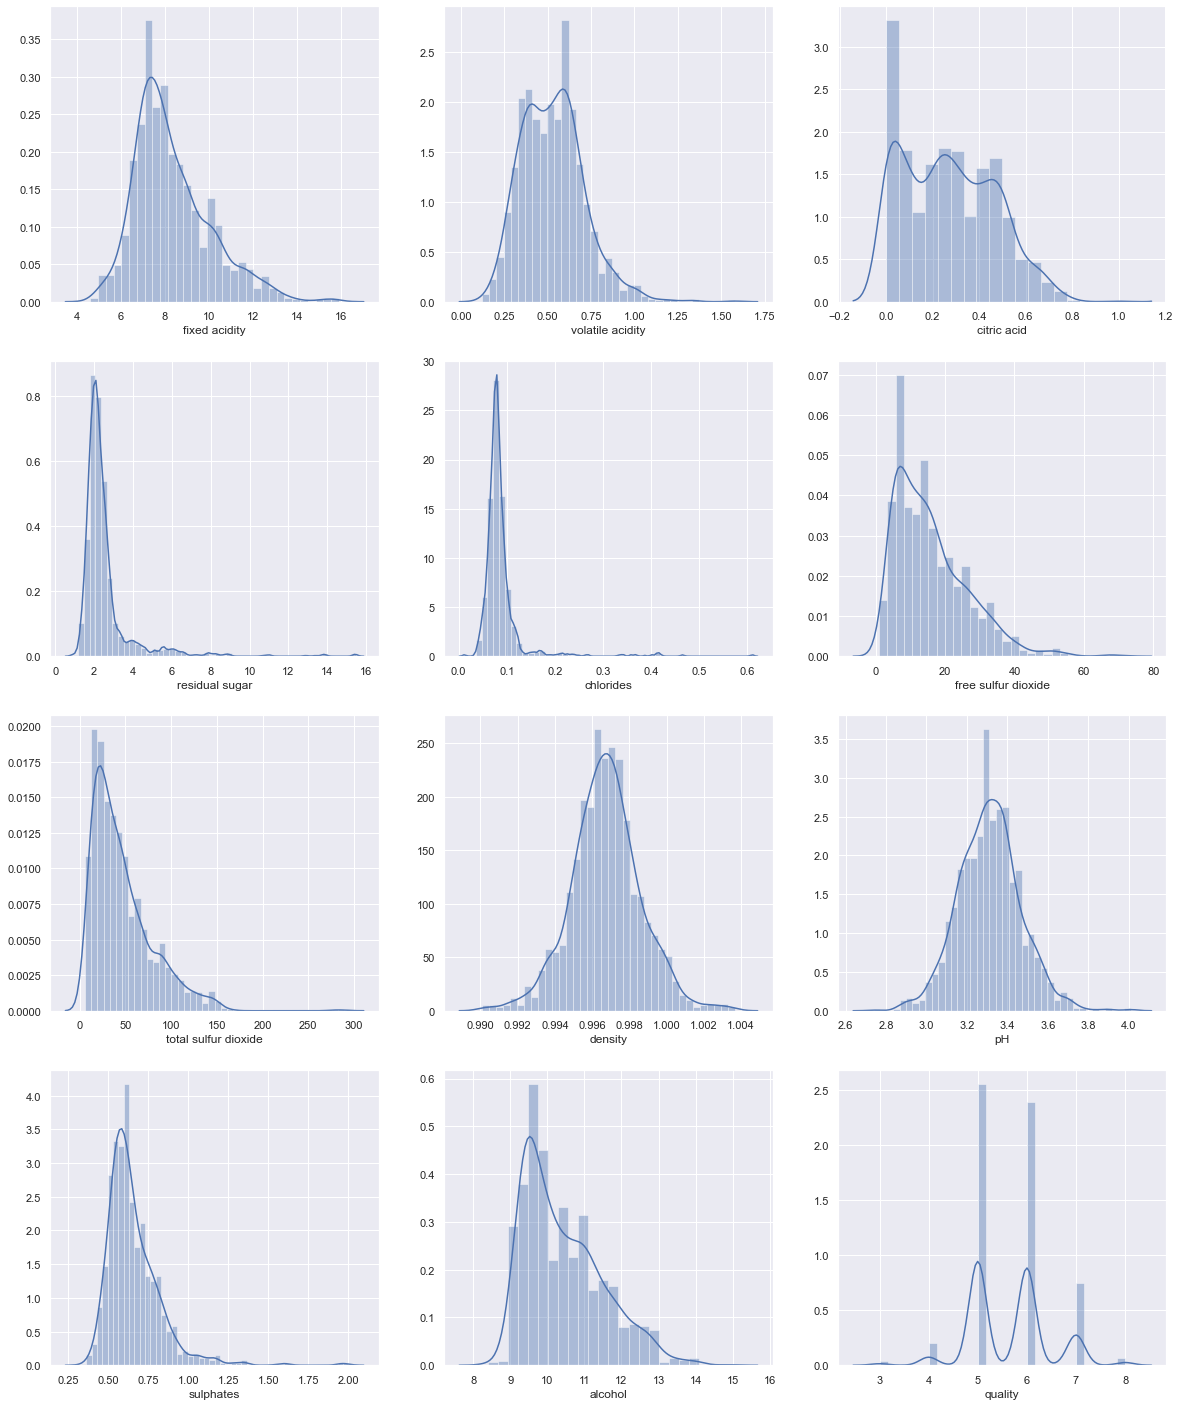

In [64]:
#plotting fraph to check if the data is normalized
plt.figure(figsize=(20,25))
plotnumber = 1
for col in data_logistic:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data_logistic[col])
        plt.xlabel(col)
    plotnumber += 1
plt.show()

In [65]:
#Splitting dataset in feature and target column
data_logistic.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [66]:
x = data_logistic.drop(columns='quality')#Feature Columns
y = data_logistic['quality'] #Target Columns

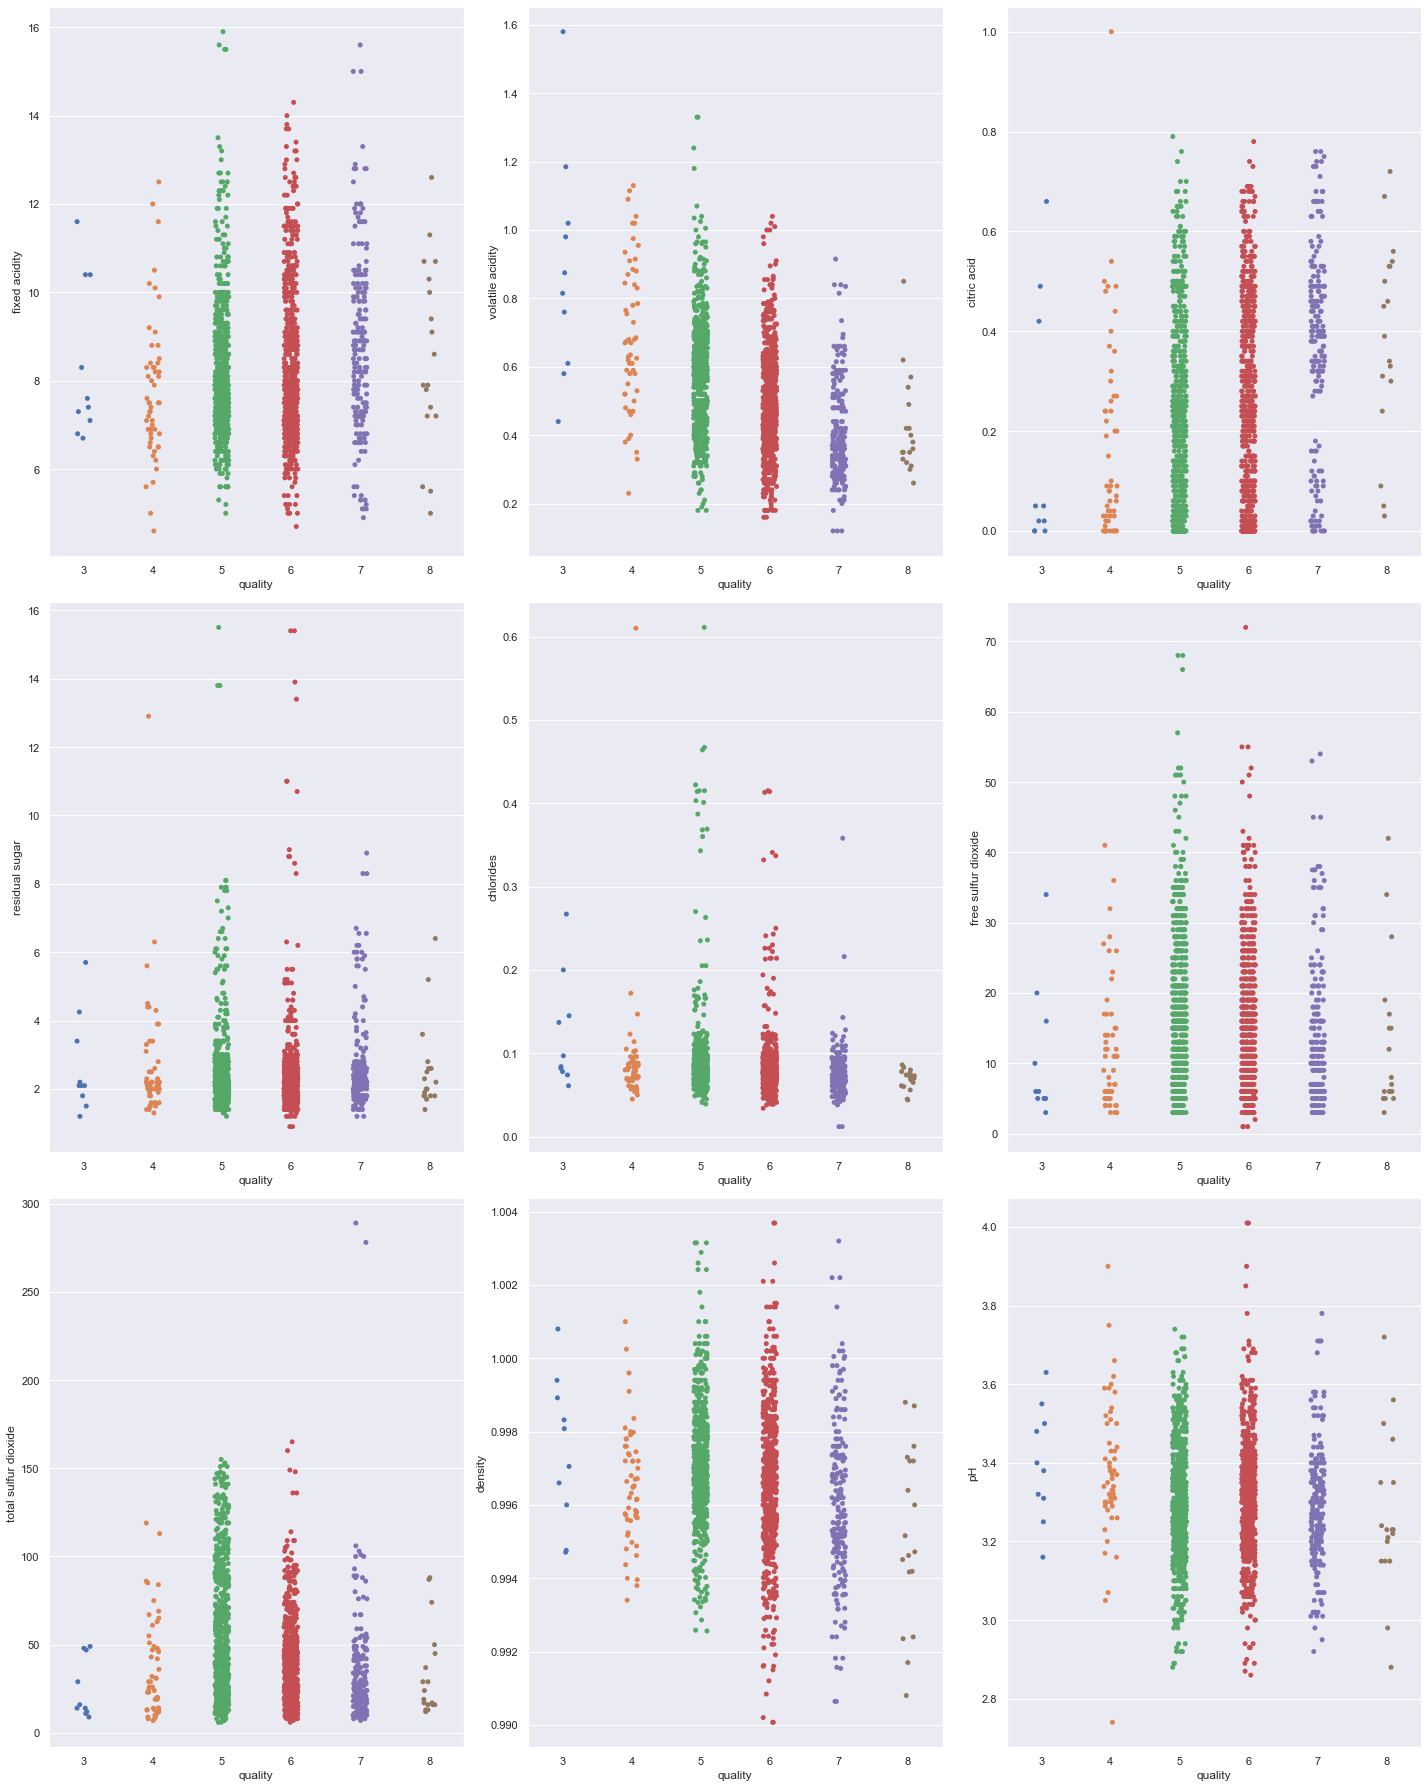

In [67]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [68]:
x.drop(columns = ['fixed acidity','density'],inplace=True)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.96187667, -1.39147228, -0.45321841, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [ 1.96744245, -1.39147228,  0.04341614, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [ 1.29706527, -1.18607043, -0.16942723, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-0.09955388, -0.72391627, -0.16942723, ...,  0.70550789,
         0.54204194,  0.54162988],
       [ 0.65462046, -0.77526673, -0.38227061, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.21684919,  1.02199944,  0.75289408, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [53]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns

In [54]:
vif

,vif,Features
0,1.653927,volatile acidity
1,2.183606,citric acid
2,1.093499,residual sugar
3,1.370251,chlorides
4,1.939203,free sulfur dioxide
5,2.008574,total sulfur dioxide
6,1.610235,pH
7,1.334713,sulphates
8,1.279630,alcohol


In [70]:
data_logistic.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##### Column 'Fixed Acidity' and 'density' has VIF value > 5 which means that they were highly collinear so we removed them

In [73]:
#Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [74]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred = model.predict(x_test)
y_pred

array([5, 5, 5, 5, 7, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5,
       3, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 7,
       8, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 7, 7, 5, 5,
       5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 7, 5, 8, 7, 6, 5,
       6, 7, 5, 7, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 7,
       6, 5, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5, 7, 6, 7, 5, 5, 6, 5, 7, 5, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       6, 7, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 7,

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = (accuracy_score(y_test,y_pred))*100
accuracy

57.25

In [96]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  11,   4,   0,   0],
       [  1,   0, 128,  46,   1,   1],
       [  0,   0,  58,  82,  19,   1],
       [  0,   0,   5,  21,  19,   0],
       [  0,   0,   0,   0,   1,   0]], dtype=int64)

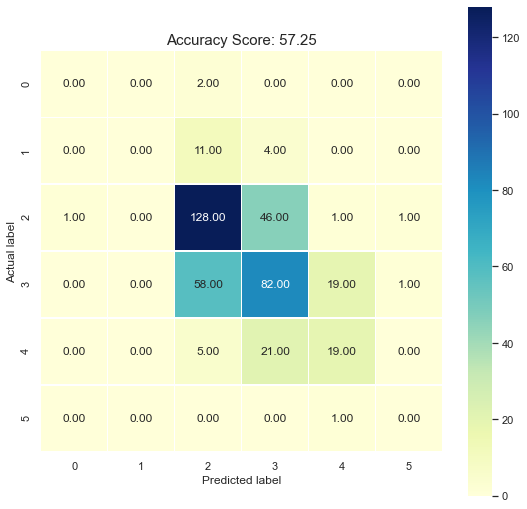

In [97]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".2f", linewidths=.5, square = True, cmap ='YlGnBu' );
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [98]:
model.intercept_

array([-3.06143961, -0.13448889,  2.6032635 ,  2.77671418,  0.60357315,
       -2.78762232])

In [100]:
model.coef_

array([[ 1.27534244,  0.76029158,  0.23372521,  0.44489509,  0.13434301,
        -0.78000873,  0.5474999 , -0.41661496, -1.28019742],
       [ 0.47335184, -0.09173891,  0.16995312,  0.34327312, -0.22000862,
         0.11462078,  0.26832962, -0.21337735, -0.47366163],
       [-0.04458874, -0.2292754 , -0.1390278 ,  0.34346585, -0.18680725,
         0.87613185,  0.04259102, -0.43755709, -0.84312357],
       [-0.51056452, -0.34375502, -0.21778051,  0.2090497 , -0.00478073,
         0.28111387,  0.00499708, -0.06194349,  0.1006826 ],
       [-0.86919216, -0.07299148,  0.02788985, -0.17555951,  0.10867115,
        -0.10250626, -0.08689783,  0.43477903,  0.90840062],
       [-0.32434886, -0.02253077, -0.07475987, -1.16512424,  0.16858244,
        -0.38935152, -0.77651979,  0.69471387,  1.5878994 ]])

# Decision Tree


In [101]:
data_dt = data

In [103]:
data_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [108]:
data_dt.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [123]:
#Splitting into feature and target column
x = data_dt.drop(columns='quality')
y = data_dt['quality']

In [124]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(x)

In [125]:
#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.25,random_state = 1)

In [126]:
data_dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [127]:
#Training Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [128]:
clf.score(x_train,y_train)

1.0

In [129]:
accuracy_dt = clf.score(x_test,y_test)*100
accuracy_dt

59.25

In [130]:
y_pred = clf.predict(x_test)

In [131]:
y_pred

array([5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 7, 5, 7, 5, 7, 5, 6, 5, 7, 6, 5, 5, 5, 7, 5, 6, 5, 6, 7,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 7,
       5, 6, 5, 7, 6, 7, 6, 5, 7, 6, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6,
       7, 5, 6, 6, 5, 7, 5, 5, 6, 5, 4, 7, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5,
       7, 6, 5, 7, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 7, 6, 6,
       6, 6, 7, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 7, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 7, 6, 5, 5, 7, 5, 5, 5, 6, 6,
       7, 7, 5, 6, 6, 5, 6, 5, 5, 4, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 7, 6, 5, 5, 6, 5, 6, 5, 7, 4, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 5, 6,

In [132]:
from sklearn.metrics import confusion_matrix
conf_mat_dt = confusion_matrix(y_test,y_pred)
conf_mat_dt

array([[  0,   1,   0,   0,   0,   0],
       [  1,   2,   9,   4,   0,   0],
       [  0,   0, 118,  49,   4,   0],
       [  0,   3,  52,  93,  18,   1],
       [  0,   0,   7,  11,  23,   1],
       [  0,   0,   0,   1,   1,   1]], dtype=int64)

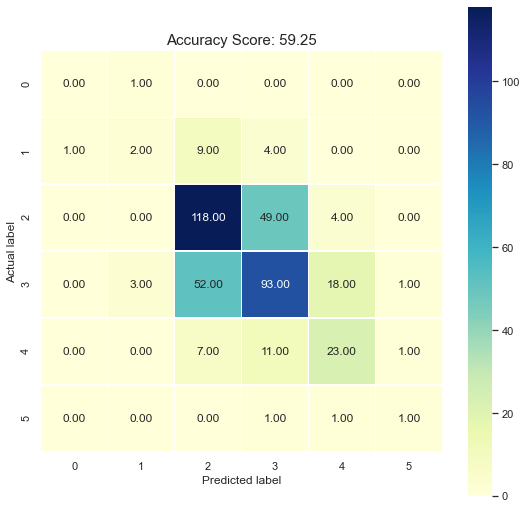

In [133]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat_dt, annot=True, fmt=".2f", linewidths=.5, square = True, cmap ='YlGnBu' );
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_dt)
plt.title(all_sample_title, size = 15);